In [1]:
%load_ext autoreload
%autoreload 2  
%reload_ext autoreload

In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bgspy.recmap import RecMap
from bgspy.utils import load_seqlens

In [3]:
plt.show()
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

# Recombination Maps

In [4]:
sl = load_seqlens('../data/fit_annotation/hg38_seqlens.tsv')
chroms = list(sl.keys())

In [5]:
hm = RecMap('../data/annotation/hapmap_genetic_map.txt', seqlens=sl)

In [95]:
dc = RecMap('../data/fit_annotation/decode_2019_map.txt', seqlens=sl)

In [103]:
aa = RecMap('../data/annotation/aamap_hg38.tsv', seqlens=sl)

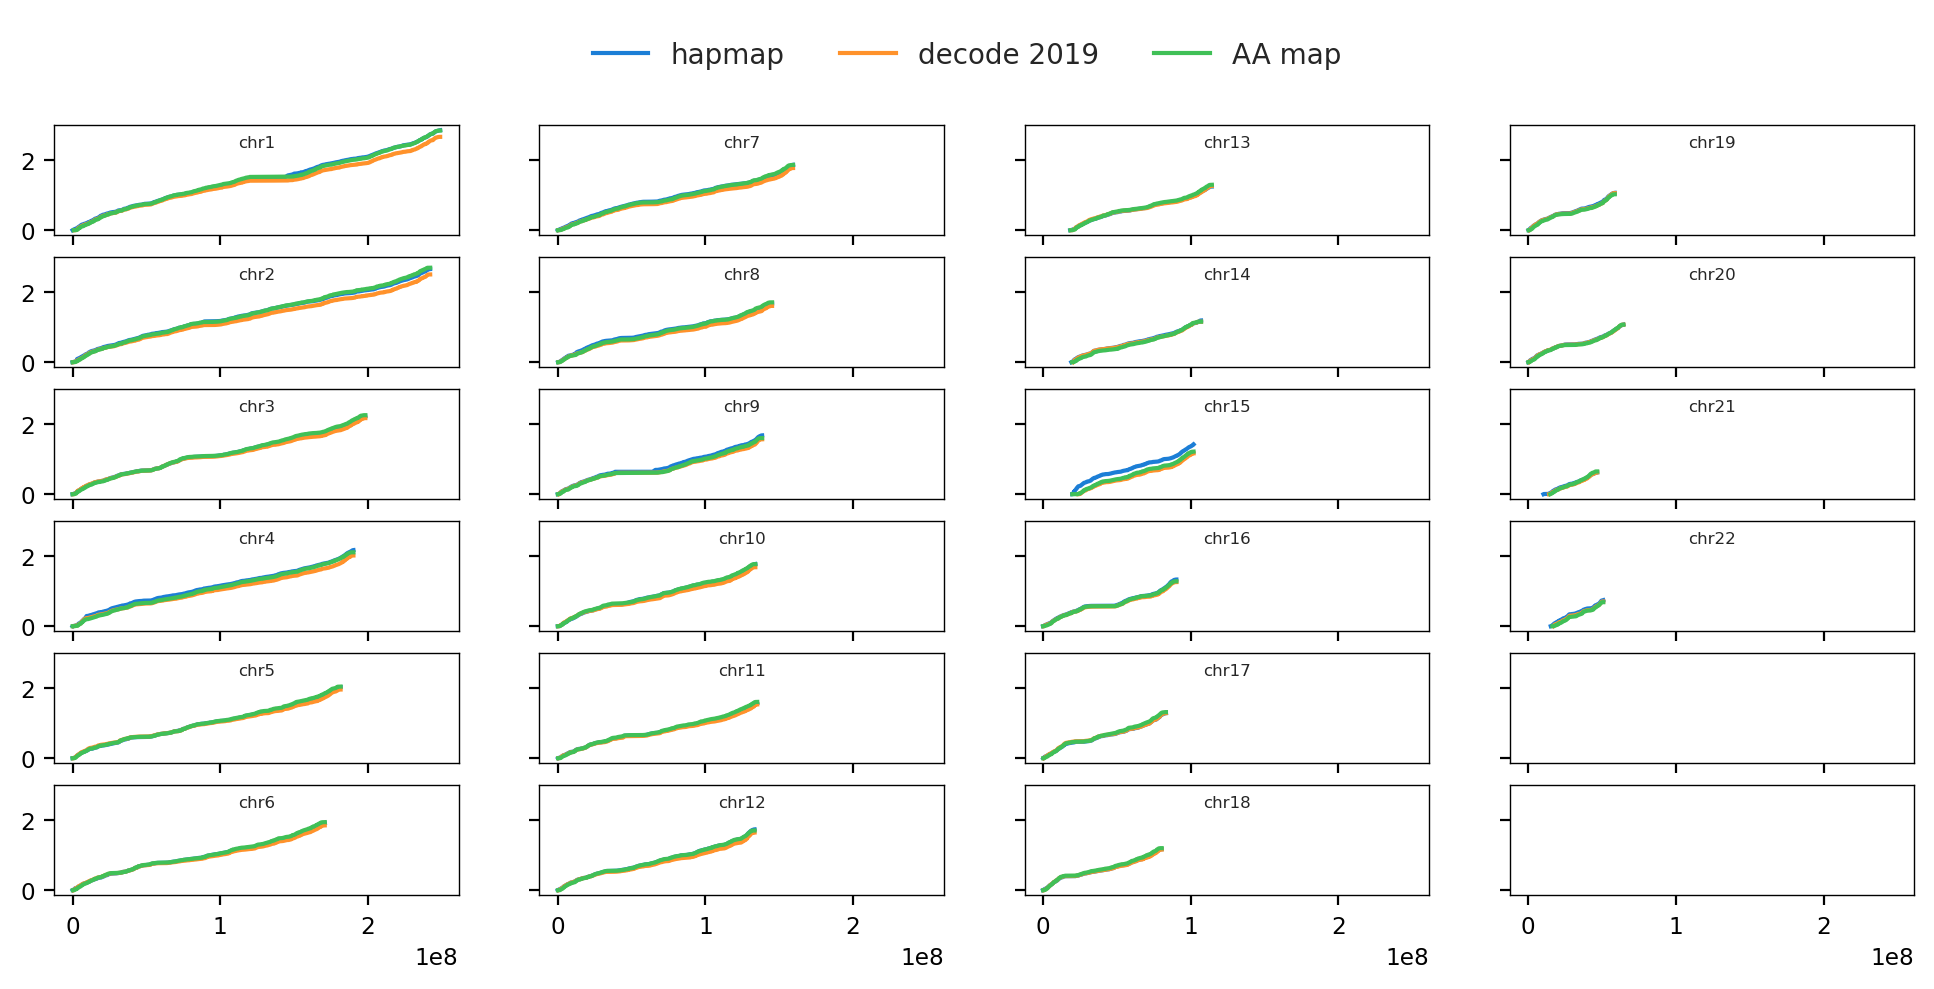

In [108]:
nc, nr = 4, 6
labs = set()

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    hmcr = hm.cum_rates[chrom]
    lab = None if 'hapmap' in labs else 'hapmap'
    fax.plot(hmcr.end, hmcr.rate, label=lab)
    labs.add('hapmap')
    
    dccr = dc.cum_rates[chrom]
    lab = None if 'decode 2019' in labs else 'decode 2019'
    fax.plot(dccr.end, dccr.rate, label=lab)
    labs.add('decode 2019')
    
    aacr = aa.cum_rates[chrom]
    lab = None if 'AA map' in labs else 'AA map'
    fax.plot(aacr.end, aacr.rate, label=lab)
    labs.add('AA map')
    #dfc = d.loc[d['Chr'] == chrom]
    #fax.plot(dfc['End'], dfc['cM']/100)
    
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)
fig.legend(loc='upper center', ncols=3)